In [1]:
#import stream_plot
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

#Function that describes the vector field for the integrator
def f(Y,t):
    X, Z = Y
    r = np.sqrt(X**2 + Z**2)
    Bx=g10*3*((1/r)**3)*(Z/r)*(X/r) +(3/2)*(1/4)**4*g20*(X/r)*(5*(Z/r)**2-1) + \
    (5/2)*(1/r)**5*g30*(Z/r)*(X/r)*((7)*(Z/r)**2-3)
    Bz=g10*((1/r)**3)*(3*(Z/r)**2-1)-G10+ (3/2)*(1/r)**4*g20*(Z/r)*(5*(Z/r)**2-3) +\
    (3/2)*(1/r)**5*g30*((20/3)*(Z/r)**4-5*(Z/r)**2-5*(Z/r)**2*(X/r)**2+1)
    Bmag=np.sqrt(Bx**2+Bz**2)    
    return((Bx/Bmag),(Bz/Bmag))


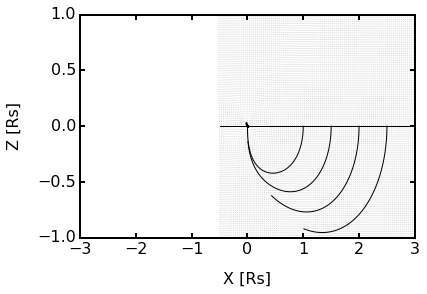

In [7]:
Radius=60268 #Km
g10=21136
g20=1526
g30=2219
G10=-11.6

#Size of simulation box
xmax=3
xmin=-0.5
NX=100
zmax=1
zmin=-zmax
NZ=100

x=np.linspace(xmin,xmax,NX)
z=np.linspace(zmin,zmax,NZ)
X, Z = np.meshgrid(x, z)
r = np.sqrt(X**2 + Z**2)


Bx=g10*3*((1/r)**3)*(Z/r)*(X/r) +(3/2)*(1/4)**4*g20*(X/r)*(5*(Z/r)**2-1) + \
(5/2)*(1/r)**5*g30*(Z/r)*(X/r)*((7)*(Z/r)**2-3)
Bz=g10*((1/r)**3)*(3*(Z/r)**2-1)-G10+ (3/2)*(1/r)**4*g20*(Z/r)*(5*(Z/r)**2-3) +\
(3/2)*(1/r)**5*g30*((20/3)*(Z/r)**4-5*(Z/r)**2-5*(Z/r)**2*(X/r)**2+1)

Bmag=np.sqrt(Bx**2+Bz**2)

ax=plt.gca()
ax.quiver( X,Z,Bx/Bmag, Bz/Bmag, color='lightgrey')

plt.plot(x,z*0,c='k')

#Integrating paths
for xx in [1.,1.5,2,2.5]:
    tspan = np.linspace(0, 2, 1000)
    x0 = [xx, 0]
    zs = odeint(f, x0, tspan)
    plt.plot(zs[:,0],zs[:,1], 'k-') # path
    
    
ax.set_ylabel("Z [Rs]")
ax.set_xlabel("X [Rs]")
ax.set_xlim(-3,3)
ax.set_ylim(-1,1)

ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15

ax.tick_params('both', length=5, width=2, which='major')
ax.tick_params('both', length=3, width=2, which='minor')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

/usr/lib/python3/dist-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


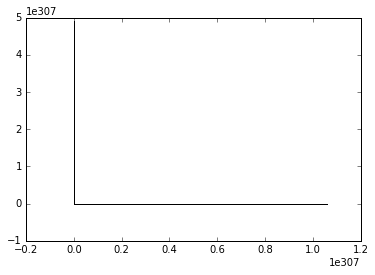